In [7]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the built-in Iris dataset from sklearn
iris = load_iris()

# Convert the data into a pandas DataFrame for easier handling
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target (species labels) to the DataFrame
df['target'] = iris.target



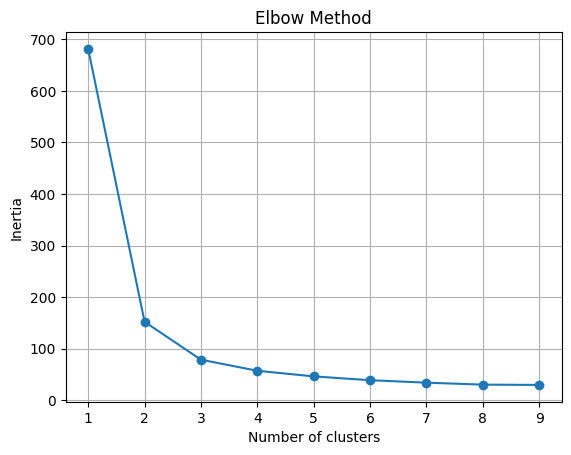

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store the inertia (WCSS) for each k
inertia = []

# Try k values from 1 to 9 to find the optimal number of clusters
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.iloc[:, :-1])  # Fit on feature columns only
    inertia.append(kmeans.inertia_)  # Append the inertia (within-cluster sum of squares)

# Plot the elbow curve to visually find the optimal k
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


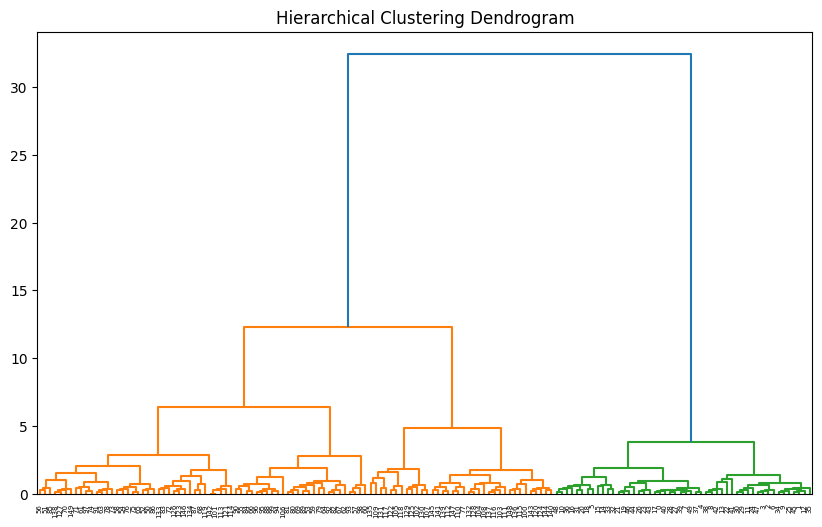

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Perform hierarchical/agglomerative clustering using 'ward' linkage method
linked = linkage(df.iloc[:, :-1], method='ward')

# Plot the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()



In [10]:
from sklearn.decomposition import PCA

# Reduce data from 4D to 2D for easy visualization using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(df.iloc[:, :-1])

# Add the reduced dimensions to the DataFrame
df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]


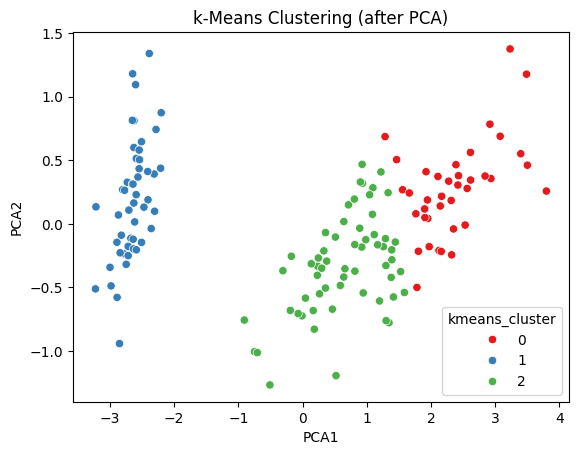

In [11]:
# Apply k-means on the 2D PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(reduced)  # Store predicted cluster labels

# Visualize the clusters in 2D PCA space
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='kmeans_cluster', palette='Set1')
plt.title('k-Means Clustering (after PCA)')
plt.show()



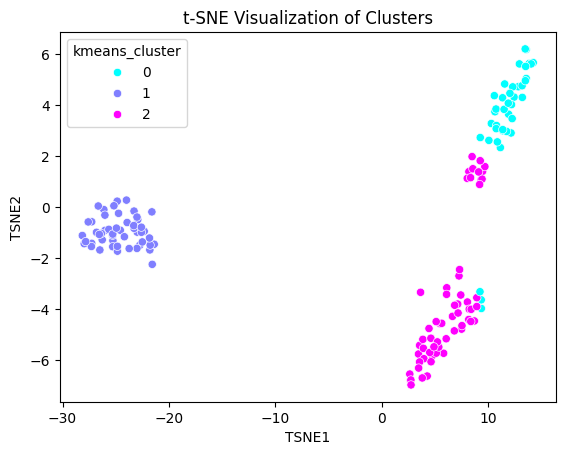

In [12]:
from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction for better nonlinear visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df.iloc[:, :-1])

# Add t-SNE results to the DataFrame
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

# Visualize clusters based on t-SNE results
sns.scatterplot(x='TSNE1', y='TSNE2', hue='kmeans_cluster', data=df, palette='cool')
plt.title('t-SNE Visualization of Clusters')
plt.show()
